In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

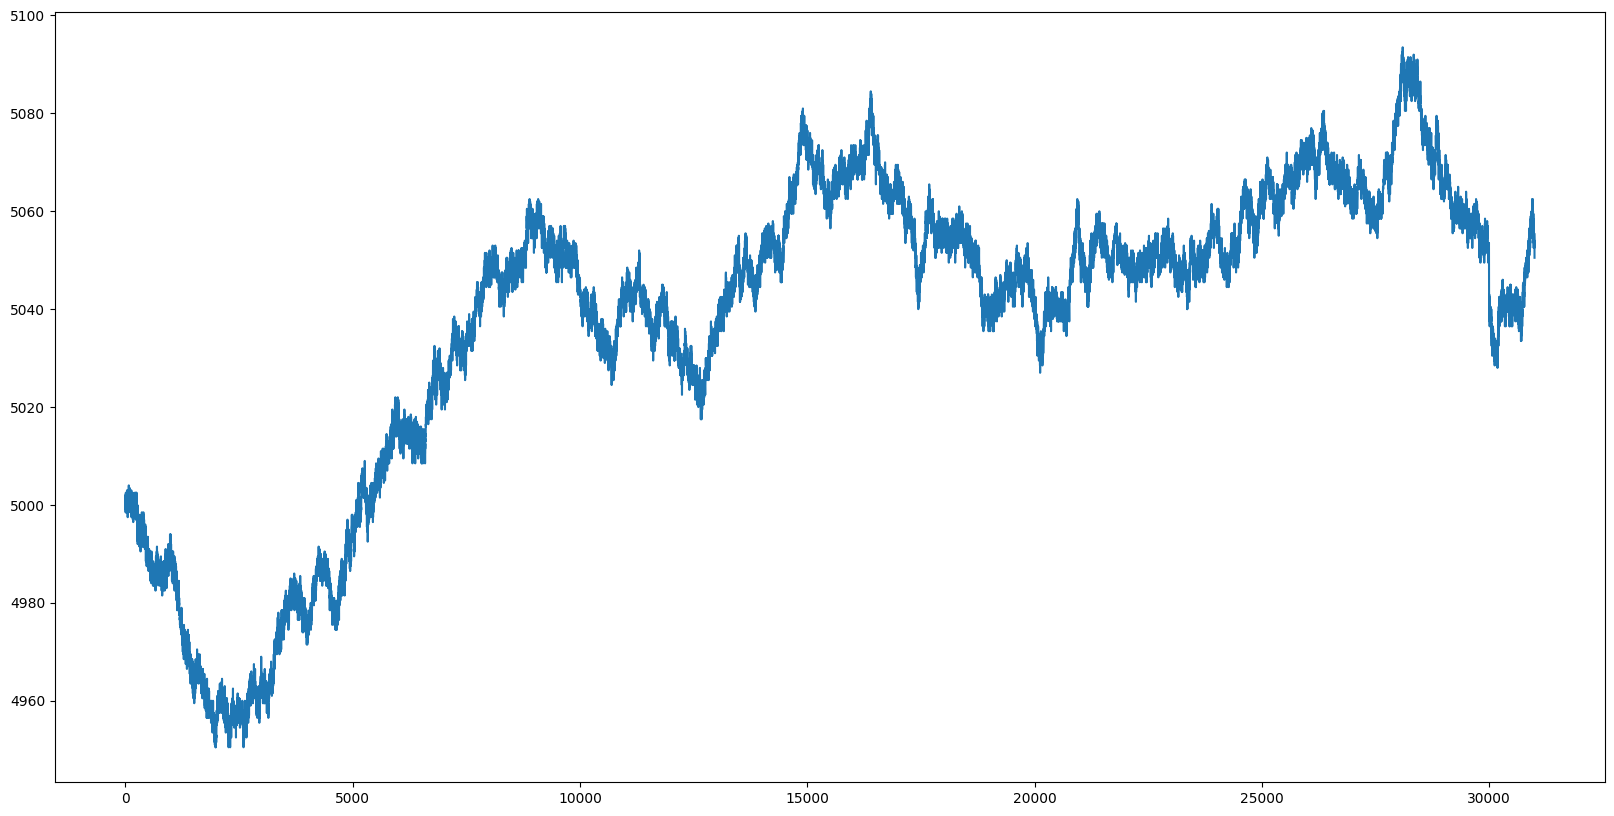

In [51]:
day_neg_one = pd.read_csv('DayData/Day_-1.csv', delimiter=';')
day_neg_two = pd.read_csv('DayData/Day_-2.csv', delimiter=';')
day_zero = pd.read_csv('DayData/Day_0.csv', delimiter=';')
day_one = pd.read_csv('DayData/Day_1.csv')

cum_data = pd.concat([day_neg_two, day_neg_one, day_zero, day_one])
cum_data.reset_index(inplace=True)

cum_star = cum_data[cum_data['product'] == 'STARFRUIT']
cum_star.reset_index(inplace=True)

plt.figure(figsize=(20,10))
plt.plot(cum_star.index, cum_star['mid_price'])
plt.show

a,b,c,d,intercept = np.polyfit(cum_star.index, cum_star['mid_price'], 4)



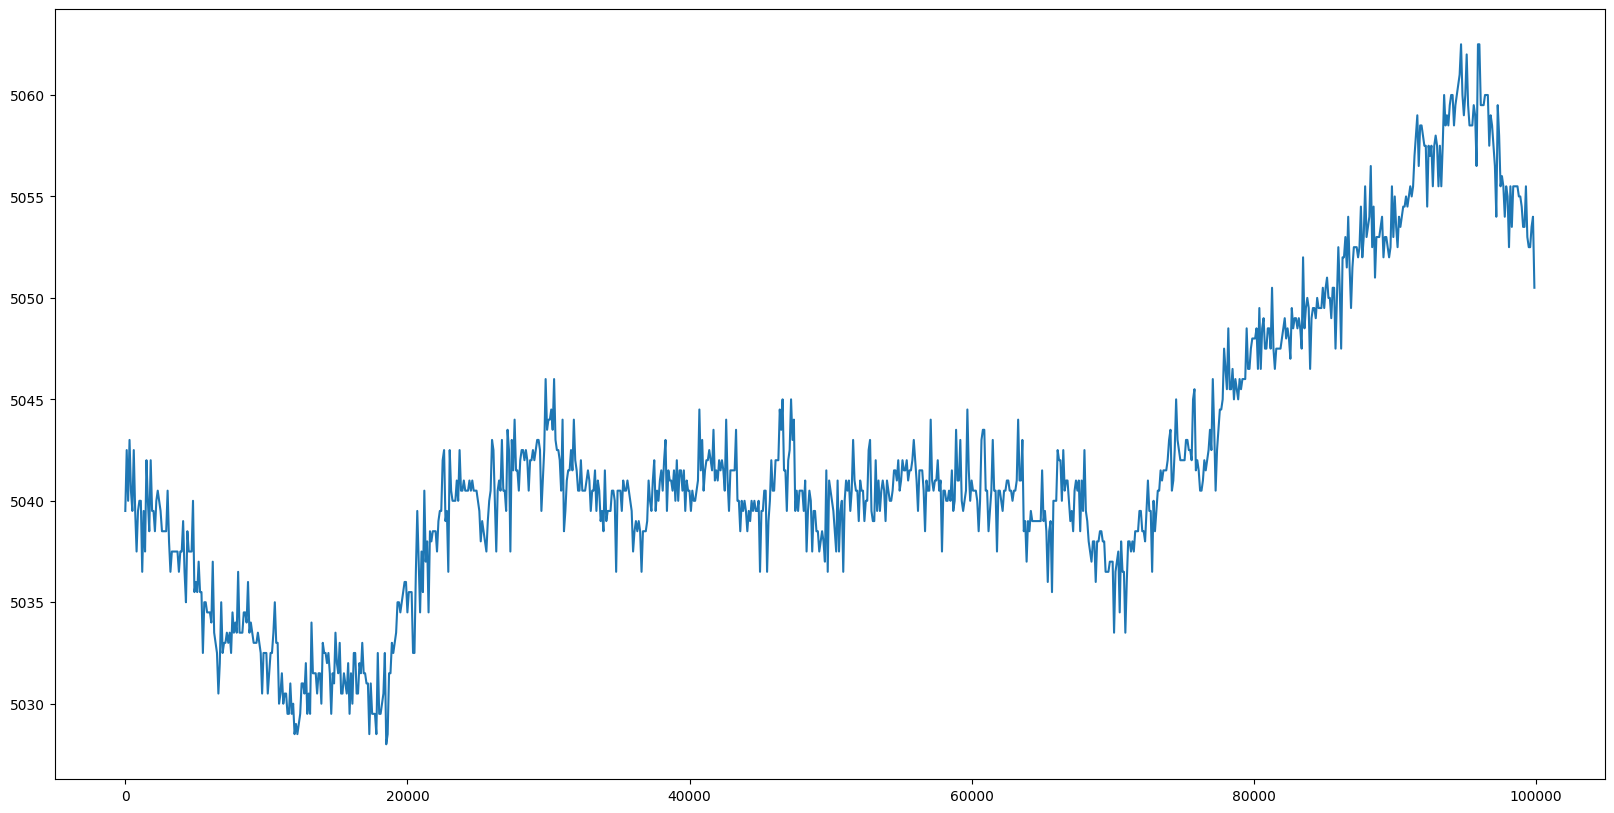

a: 2.194822134563818e-18, b: -3.526493888652451e-13, c: 1.8195854259998546e-08, d: -0.0002055528195619442, intercept: 5035.728800687614


In [52]:
star_day_one = day_one[day_one['product'] == 'STARFRUIT']
star_day_one.set_index('timestamp', inplace=True)

star_day_one.to_csv('star_day_one.csv')

plt.figure(figsize=(20,10))
plt.plot(star_day_one.index, star_day_one['mid_price'])
plt.show()

a,b,c,d,intercept = np.polyfit(star_day_one.index, star_day_one['mid_price'], 4)
print(f'a: {a}, b: {b}, c: {c}, d: {d}, intercept: {intercept}')

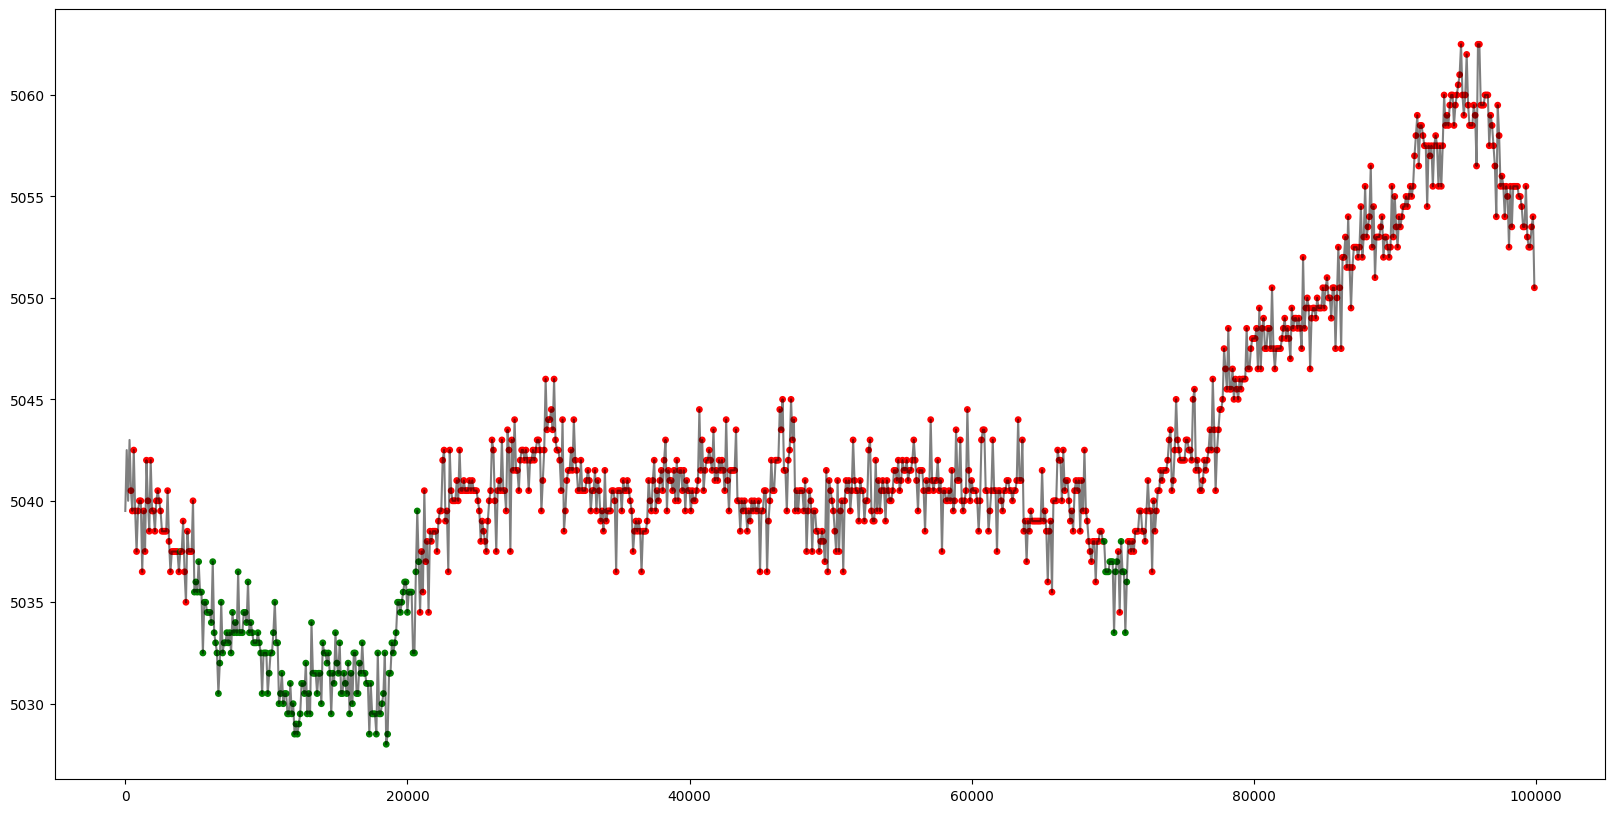

In [53]:
star_pnl = pd.read_csv('409pnl.csv')
star_pnl = star_pnl[star_pnl['product'] == 'STARFRUIT']
star_pnl.set_index('timestamp', inplace=True)
star_pnl['color'] = ['red' if x < 0 else 'green' if x > 0 else 'none' for x in star_pnl['profit_and_loss']]

plt.figure(figsize=(20,10))
plt.plot(star_pnl.index, star_pnl['mid_price'], color='black', alpha=0.5)
plt.scatter(star_pnl.index, star_pnl['mid_price'], c=star_pnl['color'], s=15)
plt.show()

In [54]:
coef = [3.72536029254, -1.613913639929, -5.209307802657288, 0.00943688103602776]
intercept = 4959.376030787304

for i in range(4, len(star_day_one)):

    star_cache = star_day_one.iloc[i-4:i]['mid_price'].to_list()
    
    next_price = coef[0]*star_cache[-4] + coef[1]*star_cache[-3] + coef[2]*star_cache[-2] + coef[3]*star_cache[-1] + intercept
    # next_price = coef[0]* star_cache[0]**4 + coef[1]*star_cache[1]**3 + coef[2]*star_cache[2]**2 + coef[3]*star_cache[3] + intercept
    
    next_price = int(round(next_price))

    print(f'Predicted: {next_price}, Actual: {star_day_one.iloc[i+1]["mid_price"]}') if i < len(star_day_one)-1 else None

    

Predicted: -10612, Actual: 5039.5
Predicted: -10613, Actual: 5042.5
Predicted: -10614, Actual: 5039.5
Predicted: -10593, Actual: 5037.5
Predicted: -10617, Actual: 5039.5
Predicted: -10610, Actual: 5040.0
Predicted: -10583, Actual: 5040.0
Predicted: -10602, Actual: 5036.5
Predicted: -10615, Actual: 5039.5
Predicted: -10608, Actual: 5037.5
Predicted: -10588, Actual: 5042.0
Predicted: -10598, Actual: 5040.0
Predicted: -10605, Actual: 5038.5
Predicted: -10615, Actual: 5042.0
Predicted: -10619, Actual: 5039.5
Predicted: -10591, Actual: 5039.5
Predicted: -10614, Actual: 5038.5
Predicted: -10612, Actual: 5040.0
Predicted: -10595, Actual: 5040.5
Predicted: -10600, Actual: 5040.0
Predicted: -10606, Actual: 5039.5
Predicted: -10614, Actual: 5038.5
Predicted: -10607, Actual: 5038.5
Predicted: -10602, Actual: 5038.5
Predicted: -10598, Actual: 5038.5
Predicted: -10598, Actual: 5040.5
Predicted: -10602, Actual: 5038.0
Predicted: -10602, Actual: 5036.5
Predicted: -10612, Actual: 5037.5
Predicted: -10